# Matplotlib basemap 

- http://matplotlib.org/basemap/

## Import necessary packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exploringShipLogbooks.basic_utils import extract_logbook_data
from mpl_toolkits.basemap import Basemap

%matplotlib inline

## Extract data from the weather logbook

In [2]:
logbook_data = extract_logbook_data('CLIWOC15.csv')

/Applications/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Convert longitude units from -180 to 180 degree to 0 to 360 degrees

In [3]:
logbook_data['LongitudeUnits'].value_counts()

180 degrees    143690
360 degrees     73986
Unknown         40121
360 GRADOS      18605
180 GRADOS       2332
180 graden        849
unknown           166
DESCONOCIDO        77
Name: LongitudeUnits, dtype: int64

In [4]:
degrees_180 = logbook_data['LongitudeUnits'] == '180 degrees' 
grados_180 = logbook_data['LongitudeUnits'] == '180 GRADOS' 
graden_180 = logbook_data['LongitudeUnits'] == '180 graden' 

In [5]:
mask = [any(tup) for tup in zip(degrees_180, grados_180, graden_180)]

In [6]:
logbook_data['Lon3'][mask] = logbook_data['Lon3'][mask] + 180
logbook_data['LongitudeUnits'][mask]  = '360 degrees'

/Applications/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Find logs that contain latitude and longitude positions

In [9]:
valid_locations = pd.notnull(logbook_data['Lat3']) & pd.notnull(logbook_data['Lon3'])

## Plot these locations on a map

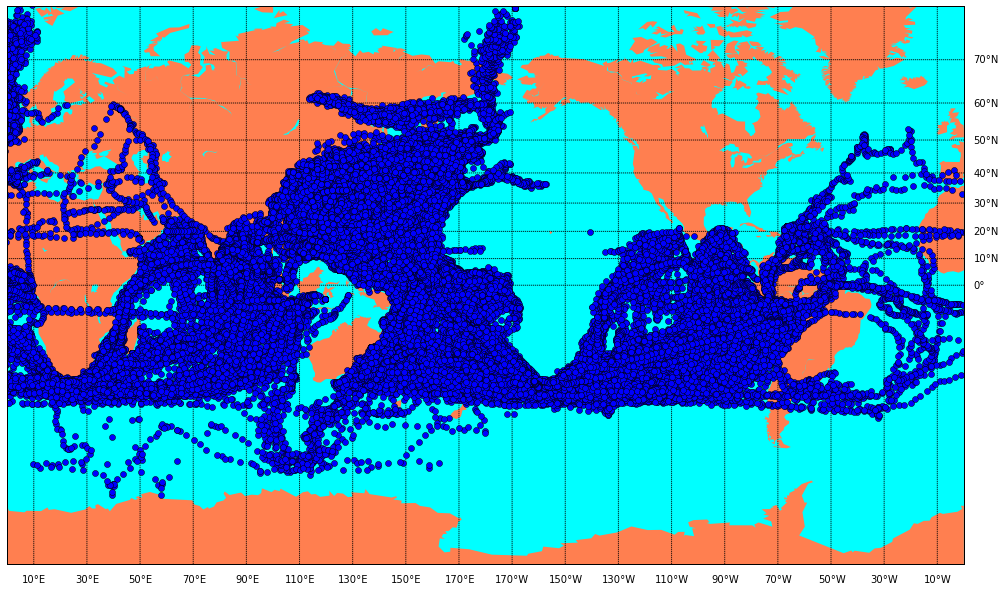

In [18]:
plt.figure(figsize=(20,10))
# setup Lambert Conformal basemap.
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m = Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
#lon, lat = -104.237, 40.125 # Location of Boulder
#logbook_data['Lon3'][logbook_data['LongitudeUnits'] == '180 degrees'] = logbook_data['Lon3'][logbook_data['LongitudeUnits'] == '180 degrees'] + 180
lon = np.array(logbook_data['Lon3'][valid_locations])
lat = np.array(logbook_data['Lat3'][valid_locations])
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
plt.show()
